# Peasron Correlation Score vs Predictive Power Score

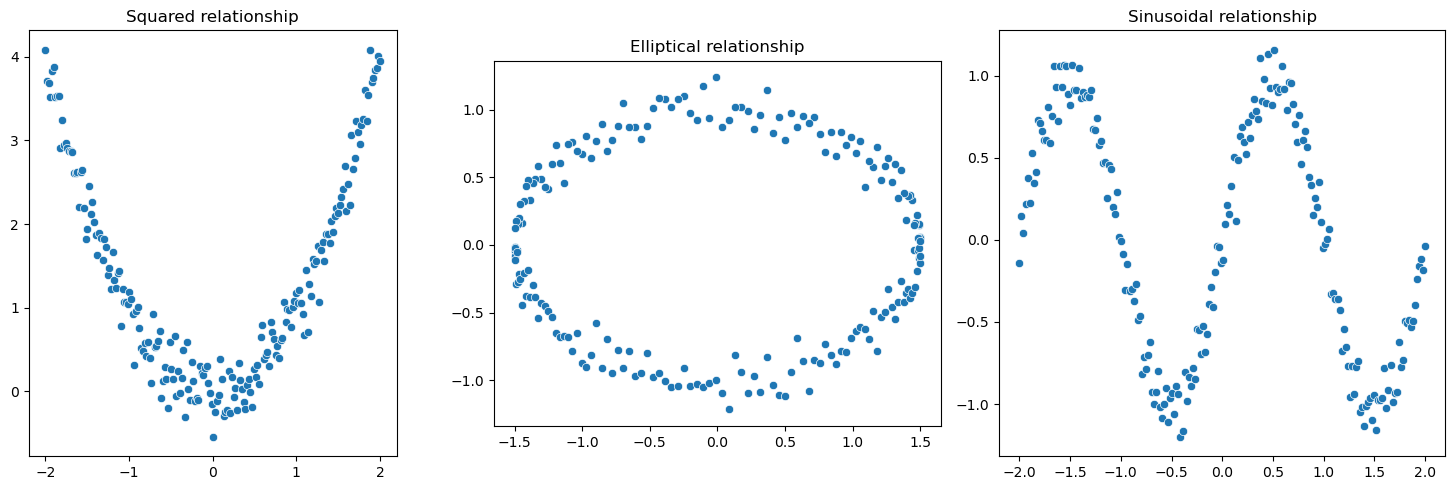

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

# Parabolic distribution (y = x^2)
x_parabolic = np.linspace(-2, 2, 200)
y_parabolic = x_parabolic**2 + np.random.normal(0, 0.2, 200)


# Elliptical correlation with noise
theta = np.linspace(0, 2 * np.pi, 200)
x_ellipse = 1.5 * np.cos(theta) 
y_ellipse = np.sin(theta) + np.random.normal(0, 0.1, 200)

# Sinusoidal correlation with noise
x_sine = np.linspace(-2, 2, 200)
y_sine = np.sin(x_sine * np.pi) + np.random.normal(0, 0.1, 200)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Squared correlation
sns.scatterplot(x=x_parabolic, y=y_parabolic, ax=axes[0])
axes[0].set_title("Squared relationship")
axes[0].set_aspect('equal', 'box')

# Elliptical correlation with noise
sns.scatterplot(x=x_ellipse, y=y_ellipse, ax=axes[1])
axes[1].set_title("Elliptical relationship")
axes[1].set_aspect('equal', 'box')

# Sinusoidal correlation with noise
sns.scatterplot(x=x_sine, y=y_sine, ax=axes[2])
axes[2].set_title("Sinusoidal relationship")

plt.savefig('three_relationship_plots.png', format='png')

plt.tight_layout()
plt.show()


In [4]:
import ppscore as pps
import pandas as pd 

# Compute Pearson correlation and PPS for each relation
relations = {
    "Parabolic": (x_parabolic, y_parabolic),
    "Elliptical": (x_ellipse, y_ellipse),
    "Sinusoidal": (x_sine, y_sine)
}

results = {
    "Relation": [],
    "Pearson Correlation": [],
    "PPS": []
}

for name, (x_coord, y_coord) in relations.items():
    # Compute Pearson corr. coef & Predictive Power Score
    pearson_corr = np.corrcoef(x, y)[0, 1]
    pps_score = pps.score(df, "x", "y")["ppscore"]
    
    results["Relation"].append(name)
    results["Pearson Correlation"].append(pearson_corr)
    results["PPS"].append(pps_score)

# Display results in a table
results_df = pd.DataFrame(results)
display(results_df)


,Relation,Pearson Correlation,PPS
0,Parabolic,-0.003839,0.767987
1,Elliptical,-0.002650,0.000000
2,Sinusoidal,-0.371104,0.801733


{'x': 'x',
 'y': 'y',
 'ppscore': 0.6706527067501082,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.0178787968589815,
 'model_score': 0.33523562660196193,
 'model': DecisionTreeRegressor()}

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.670653,regression,True,mean absolute error,1.017879,0.335236,DecisionTreeRegressor()
1,error,y,0.000000,regression,True,mean absolute error,1.017879,1.332508,DecisionTreeRegressor()


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.250847,0.335273,DecisionTreeRegressor()
2,x,y,0.670653,regression,True,mean absolute error,1.017879,0.335236,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,0.998473,1.333576,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.017879,1.332508,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,0.998473,1.104790,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.250847,0.283228,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


<Axes: xlabel='x', ylabel='y'>

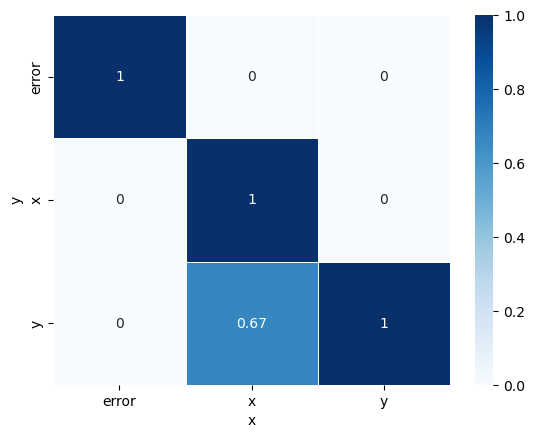

In [3]:
# To dive deeper on how PPS package works

df = pd.DataFrame(
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

# Based on the dataframe we can calculate the PPS of x predicting y:
display(pps.score(df, "x", "y"))
# We can calculate the PPS of all the predictors in the dataframe against a target y:
display(pps.predictors(df, "y"))
# Here is how we can calculate the PPS matrix between all columns very useful for collinearity
display(pps.matrix(df))

# Plotting the PPS matrix
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)